Output()

array([<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'sigma'}>],
      dtype=object)

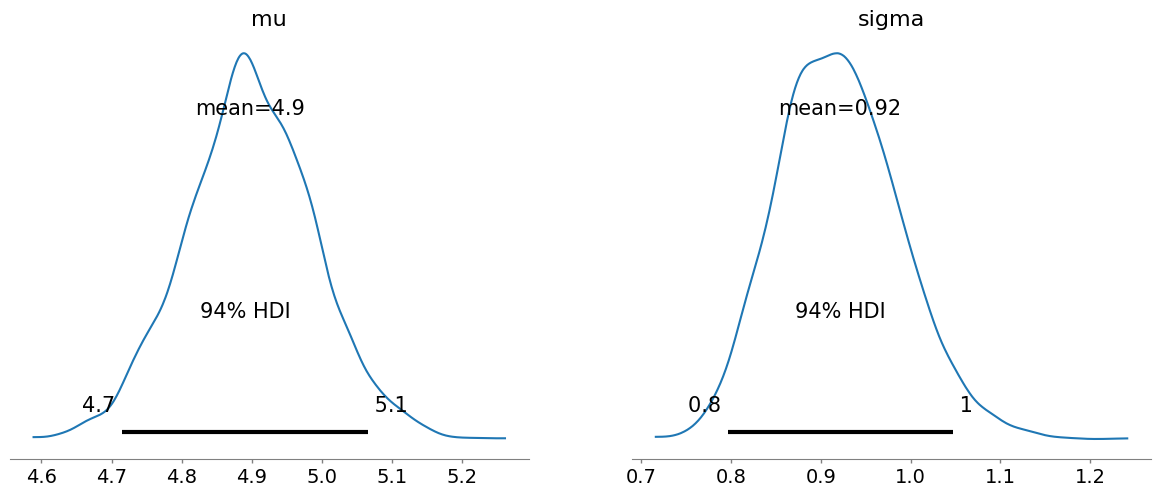

In [ ]:
# prompt: Give me a minimal demonstration of the use of pymc: create a simple model, sample it, and display the posterior with an HDI. Use arviz for the plotting.

import pymc as pm
import arviz as az
import numpy as np

# Generate some data
np.random.seed(42)
true_mu = 5
true_sigma = 1
data = np.random.normal(loc=true_mu, scale=true_sigma, size=100)


# Build the model
with pm.Model() as model:
  mu = pm.Normal("mu", mu=0, sigma=10)
  sigma = pm.HalfNormal("sigma", sigma=5)
  obs = pm.Normal("obs", mu=mu, sigma=sigma, observed=data)

  # Sample from the posterior
  idata = pm.sample(draws=2000, tune=1000)

# Display the posterior with HDI using arviz
az.plot_posterior(idata, var_names=["mu", "sigma"], hdi_prob=0.94)
